In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics  import mean_squared_error
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime, timedelta
from statsmodels.tsa.api import SimpleExpSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import numpy as np

In [2]:
def decimal_to_hms(time):
    seconds = int(time * 3600)
    return str(timedelta(seconds=seconds))

# 20200812 (Yeast 1)

Check for seasonality

In [3]:
df12 = pd.read_csv('20200812Y1.csv')

In [4]:
df12 = df12.rename(columns={'Time (h)': 'time', 'Mass (ng)': 'mass', 'Mean mass (ng)' : 'mean'})
df12 = df12.drop(['mean'], axis = 1)
df12 = df12.dropna()

In [5]:
df12 = df12[df12['mass']>0]

In [6]:
sdc = df12[['mass']].copy()

In [7]:
dc_result = seasonal_decompose(sdc, model="multiplicative", period = 100)

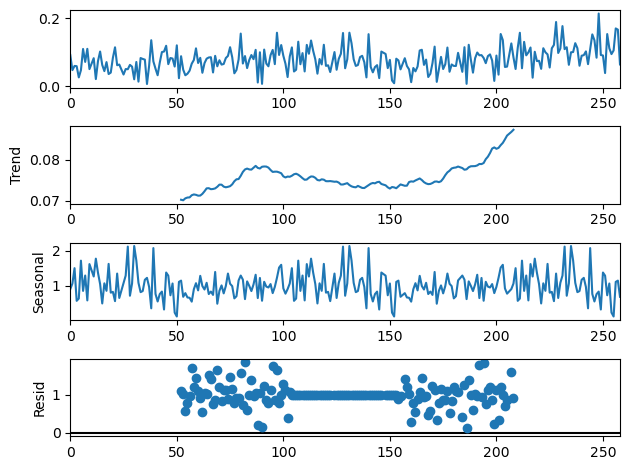

In [8]:
trend = dc_result.trend
seasonal = dc_result.seasonal
residual = dc_result.resid

dc_result.plot();

Forecasting

In [9]:
df12 = pd.read_csv('20200812Y1.csv')

In [10]:
df12 = df12.rename(columns={'Time (h)': 'time', 'Mass (ng)': 'mass', 'Mean mass (ng)' : 'mean'})
df12 = df12.drop(['mean'], axis = 1)
df12 = df12.dropna()

In [11]:
df12['time'] = df12['time'].apply(decimal_to_hms)

In [12]:
df12.set_index('time', inplace=True)

In [13]:
train_size = int(len(df12) * 0.9)
train = df12[:train_size]
test = df12[train_size:]

In [14]:
alpha = 0.3
beta = 0.1
gamma = 0.2

In [15]:
# Create the model
model = ExponentialSmoothing(train, seasonal_periods=100, trend='add', seasonal='add')

# Fit the model to the training data
model_fit = model.fit(smoothing_level=alpha, smoothing_trend=beta, smoothing_seasonal=gamma)


In [16]:
# Make predictions for the test data
predictions = model_fit.forecast(len(test))

In [17]:
# Evaluate the model
mse = mean_squared_error(test, predictions)
rmse = np.sqrt(mse)
print(f'MSE: {mse}, RMSE: {rmse}')


MSE: 0.0028397688972865184, RMSE: 0.05328948205121268


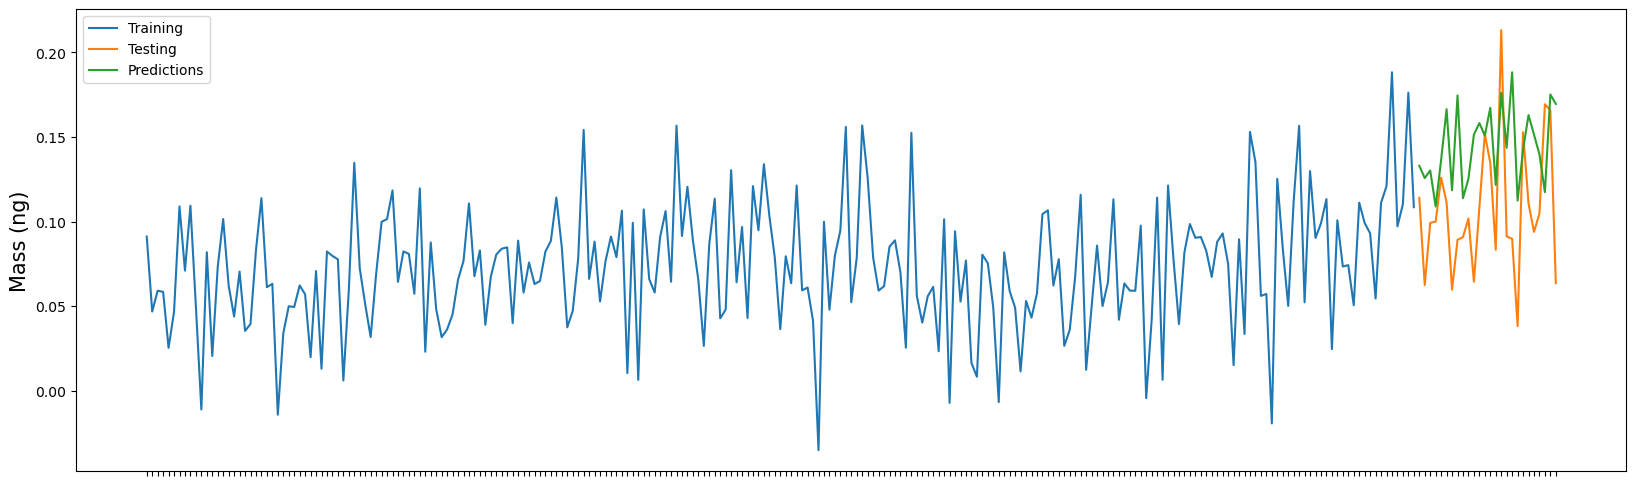

In [18]:
# Visualize the results
fig, ax = plt.subplots(figsize=(20,6)) 
plt.plot(train, label='Training')
plt.plot(test, label='Testing')
plt.plot(predictions, label='Predictions')
plt.ylabel('Mass (ng)', fontsize=15)
plt.gca().set_xticklabels([])
plt.legend()
plt.show()

In [19]:
forecast = model_fit.forecast(steps=40)
forecast

233    0.132981
234    0.125701
235    0.130195
236    0.108935
237    0.136507
238    0.166465
239    0.118475
240    0.174590
241    0.113838
242    0.125311
243    0.151465
244    0.158242
245    0.150873
246    0.167290
247    0.121681
248    0.176131
249    0.143624
250    0.188274
251    0.112375
252    0.142403
253    0.162963
254    0.151478
255    0.139778
256    0.117376
257    0.175156
258    0.169576
259    0.183768
260    0.147322
261    0.179216
262    0.154428
263    0.176733
264    0.208167
265    0.211079
266    0.189753
267    0.177096
268    0.175944
269    0.169371
270    0.196226
271    0.214958
272    0.163135
dtype: float64

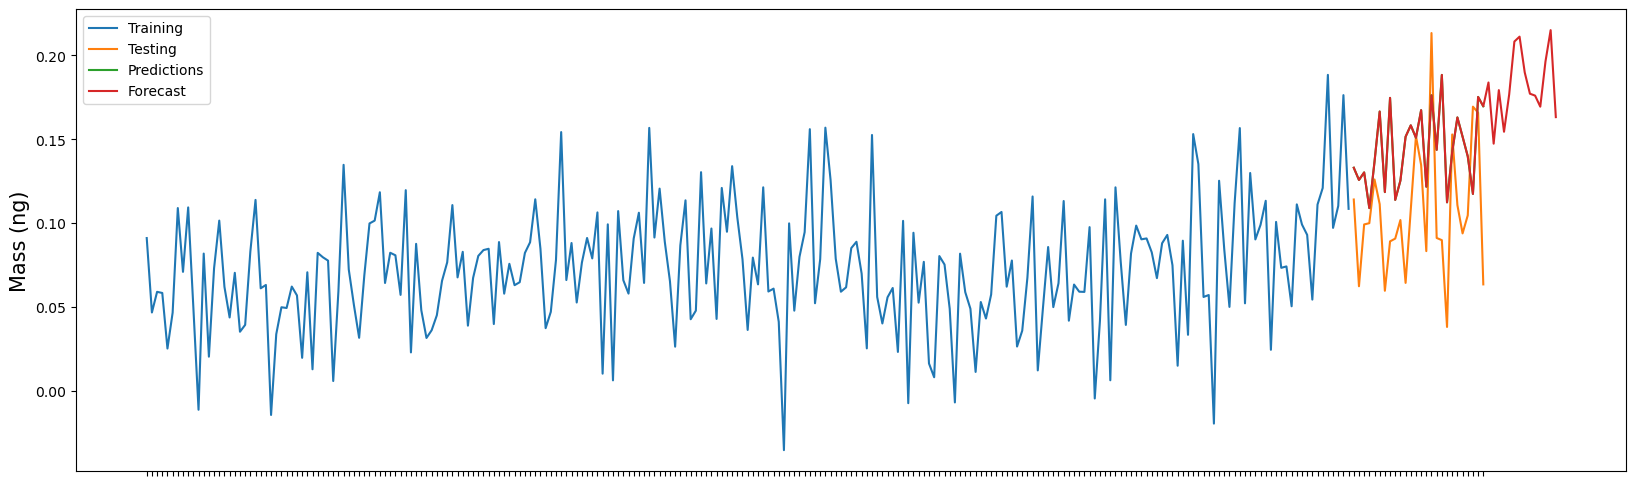

In [20]:
fig, ax = plt.subplots(figsize=(20,6)) 
plt.plot(train, label='Training')
plt.plot(test, label='Testing')
plt.plot(predictions, label='Predictions')
plt.ylabel('Mass (ng)', fontsize=15)
plt.plot(range(len(train), len(train)+len(forecast)), forecast, label='Forecast')
plt.gca().set_xticklabels([])
plt.legend()
plt.show()

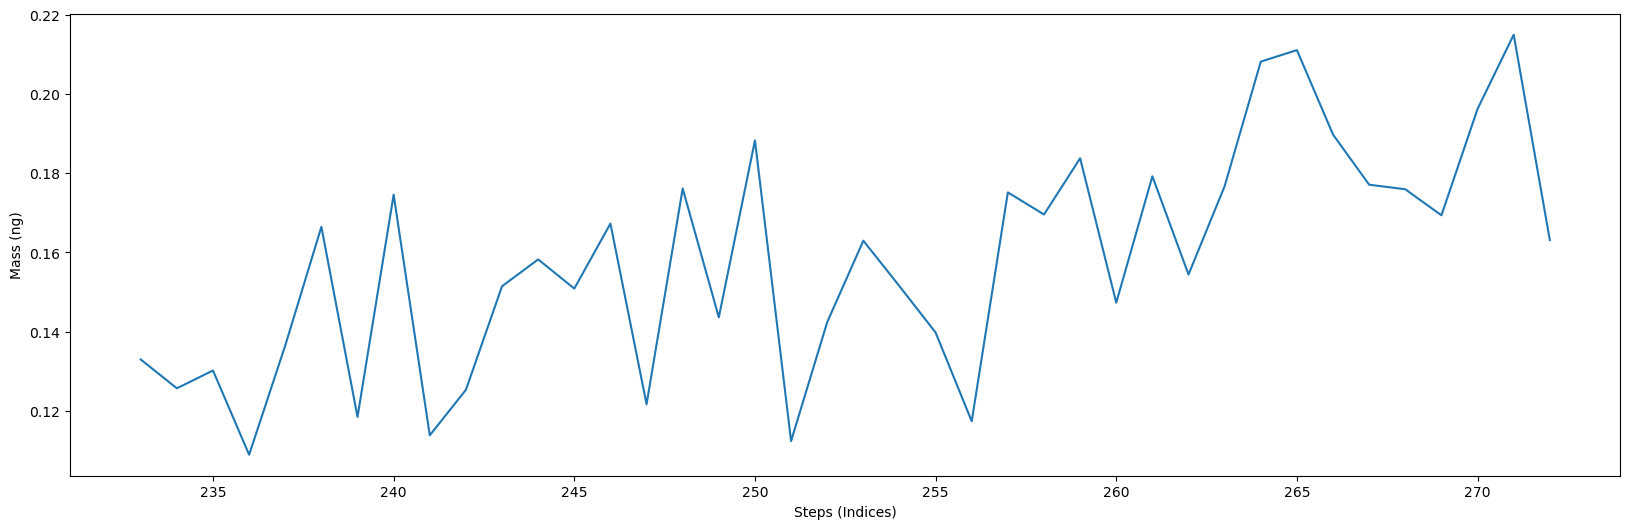

In [21]:
fig, ax = plt.subplots(figsize=(20,6)) 
plt.plot(forecast)
plt.xlabel('Steps (Indices)', fontsize=10)
plt.ylabel('Mass (ng)', fontsize=10)
plt.show()

# 20200814 (Yeast 1)

Check for seasonality

In [22]:
df14 = pd.read_csv('20200814Y1.csv')

In [23]:
df14

,Time (h),Mass (ng),Mean mass (ng)
0,0.000000,0.165787,0.165787
1,0.007265,0.161420,0.161420
2,0.020081,0.131878,0.131878
3,0.032892,0.111652,0.111652
4,0.045709,0.154861,0.154861
...,...,...,...
215,2.750415,0.369345,0.369345
216,2.763233,0.356796,0.356796
217,2.776052,0.267231,0.267231
218,2.788868,0.316140,0.316140


In [24]:
df14 = df14.rename(columns={'Time (h)': 'time', 'Mass (ng)': 'mass', 'Mean mass (ng)' : 'mean'})
df14 = df14.drop(['mean'], axis = 1)
df14 = df14.dropna()

In [25]:
df14 = df14[df14['mass']>0]

In [26]:
sdc = df14[['mass']].copy()

In [27]:
dc_result = seasonal_decompose(sdc, model="multiplicative", period = 50)

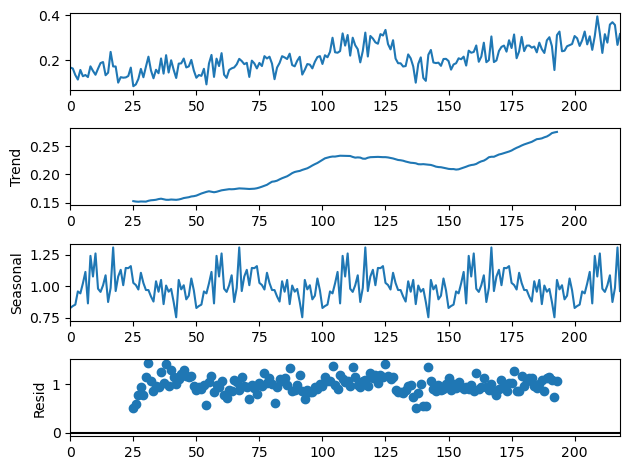

In [28]:
trend = dc_result.trend
seasonal = dc_result.seasonal
residual = dc_result.resid

dc_result.plot();

Forecasting

In [29]:
df14 = pd.read_csv('20200814Y1.csv')

In [30]:
df14 = df14.rename(columns={'Time (h)': 'time', 'Mass (ng)': 'mass', 'Mean mass (ng)' : 'mean'})
df14 = df14.drop(['mean'], axis = 1)
df14 = df14.dropna()

In [31]:
df14['time'] = df14['time'].apply(decimal_to_hms)

In [32]:
df14.head(40)

,time,mass
0,0:00:00,0.165787
1,0:00:26,0.161420
2,0:01:12,0.131878
3,0:01:58,0.111652
4,0:02:44,0.154861
5,0:03:30,0.126608
6,0:04:16,0.132093
7,0:05:02,0.122906
8,0:05:49,0.171070
9,0:06:35,0.150663


In [33]:
df14.set_index('time', inplace=True)

In [34]:
train_size = int(len(df14) * 0.85)
train = df14[:train_size]
test = df14[train_size:]

In [35]:
alpha = 0.3
beta = 0.1
gamma = 0.2

In [36]:
# Create and fit the model
model = ExponentialSmoothing(train, seasonal_periods=50, trend='add', seasonal='add')

model_fit = model.fit(smoothing_level=alpha, smoothing_trend=beta, smoothing_seasonal=gamma)


In [37]:
# Make predictions for the test data
predictions = model_fit.forecast(len(test))

In [38]:
#evaluate 
mse = mean_squared_error(test, predictions)
rmse = np.sqrt(mse)
print(f'MSE: {mse}, RMSE: {rmse}')


MSE: 0.00196407044757515, RMSE: 0.04431783441883358


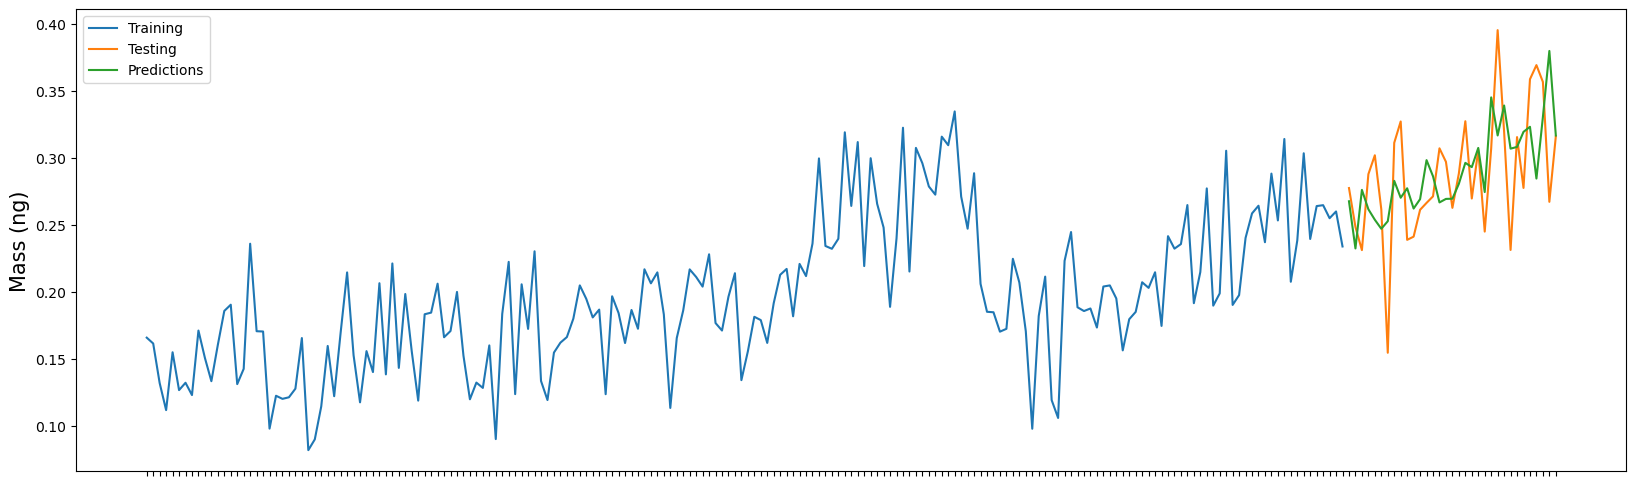

In [39]:
# Visualize the results
fig, ax = plt.subplots(figsize=(20,6)) 
plt.plot(train, label='Training')
plt.plot(test, label='Testing')
plt.plot(predictions, label='Predictions')
plt.ylabel('Mass (ng)', fontsize=15)
plt.gca().set_xticklabels([])
plt.legend()
plt.show()

In [40]:
forecast = model_fit.forecast(steps=40)
forecast

186    0.267650
187    0.232415
188    0.276157
189    0.261676
190    0.253840
191    0.247095
192    0.252749
193    0.282900
194    0.270274
195    0.277351
196    0.262212
197    0.269229
198    0.298375
199    0.286308
200    0.266784
201    0.269408
202    0.269568
203    0.280701
204    0.296351
205    0.293141
206    0.307485
207    0.274537
208    0.345231
209    0.316796
210    0.339198
211    0.306958
212    0.308231
213    0.319495
214    0.323267
215    0.284620
216    0.330592
217    0.379914
218    0.316785
219    0.328562
220    0.345113
221    0.329984
222    0.345420
223    0.347199
224    0.364804
225    0.346917
dtype: float64

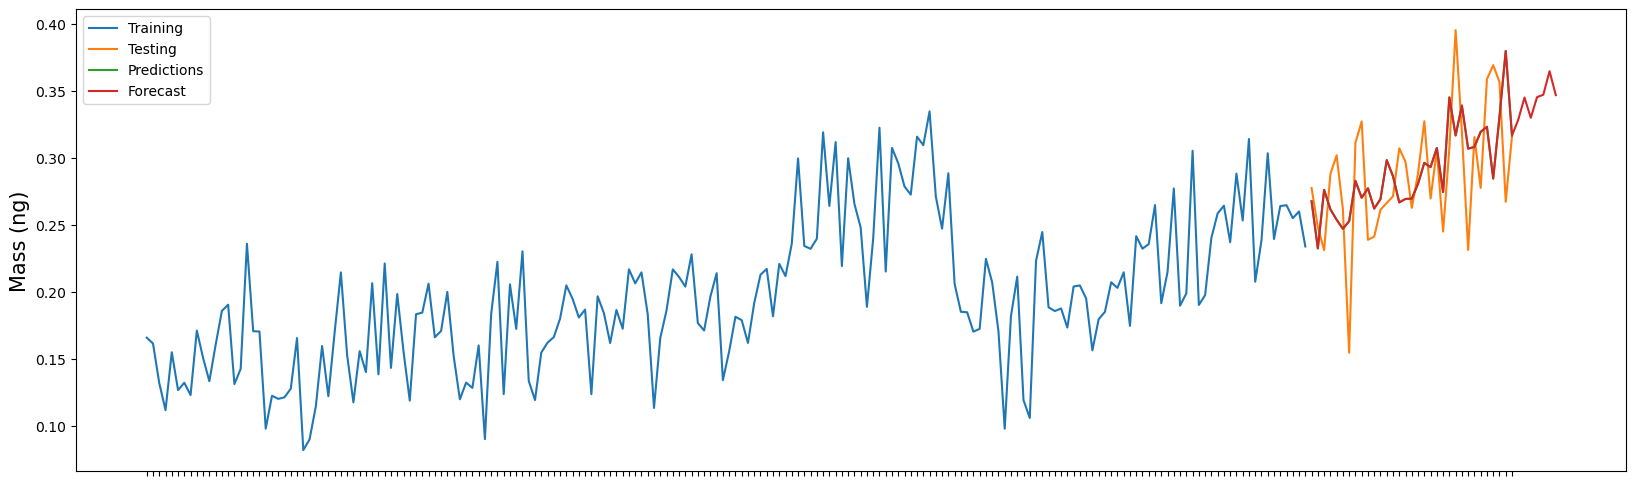

In [41]:
fig, ax = plt.subplots(figsize=(20,6)) 
plt.plot(train, label='Training')
plt.plot(test, label='Testing')
plt.plot(predictions, label='Predictions')
plt.ylabel('Mass (ng)', fontsize=15)
plt.plot(range(len(train), len(train)+len(forecast)), forecast, label='Forecast')
plt.gca().set_xticklabels([])
plt.legend()
plt.show()

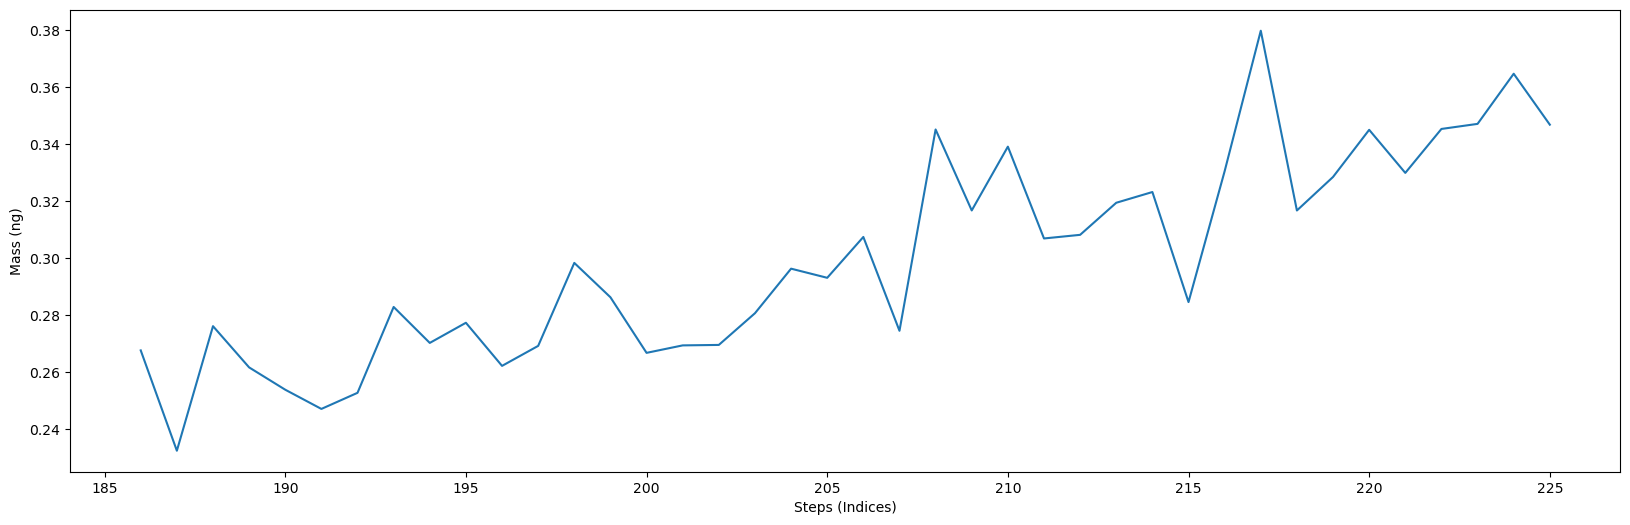

In [42]:
fig, ax = plt.subplots(figsize=(20,6)) 
plt.plot(forecast)
plt.xlabel('Steps (Indices)', fontsize=10)
plt.ylabel('Mass (ng)', fontsize=10)
plt.show()

# 20200826

Check for seasonality

In [43]:
df26 = pd.read_csv('20200826.csv')

In [44]:
df26 = df26.rename(columns={'Time (h)': 'time', 'Mass (ng)': 'mass', 'Mean mass (ng)' : 'mean'})
df26 = df26.drop(['mean'], axis = 1)
df26 = df26.dropna()

In [45]:
df26 = df26[df26['mass']>0]

In [46]:
sdc = df26[['mass']].copy()

In [47]:
dc_result = seasonal_decompose(sdc, model="multiplicative", period = 24)

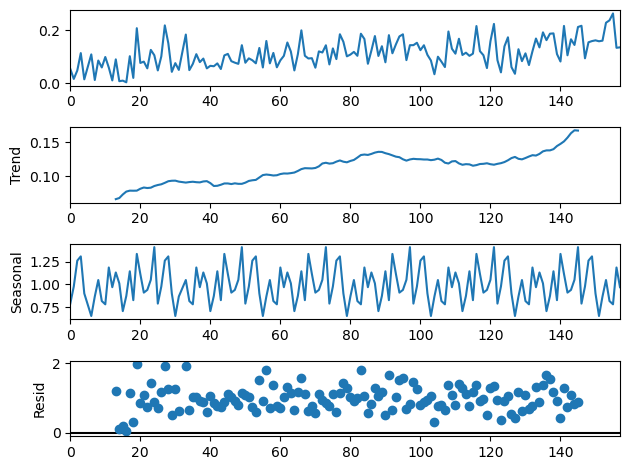

In [48]:
trend = dc_result.trend
seasonal = dc_result.seasonal
residual = dc_result.resid

dc_result.plot();

Forecasting

In [49]:
df26 = pd.read_csv('20200826.csv')

In [50]:
df26 = df26.rename(columns={'Time (h)': 'time', 'Mass (ng)': 'mass', 'Mean mass (ng)' : 'mean'})
df26 = df26.drop(['mean'], axis = 1)
df26 = df26.dropna()

In [51]:
df26['time'] = df26['time'].apply(decimal_to_hms)

In [52]:
df26.set_index('time', inplace=True)

In [53]:
train_size = int(len(df26) * 0.9)
train = df26[:train_size]
test = df26[train_size:]

In [54]:
alpha = 0.3
beta = 0.1
gamma = 0.2

In [55]:
# Create and fit the model
model = ExponentialSmoothing(train, seasonal_periods=24, trend='add', seasonal='add')

model_fit = model.fit(smoothing_level=alpha, smoothing_trend=beta, smoothing_seasonal=gamma)


In [56]:
#predict test
predictions = model_fit.forecast(len(test))

In [57]:
# Evluate the modell
mse = mean_squared_error(test, predictions)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(test, predictions)
print(f'MSE: {mse}, RMSE: {rmse}, MAPE: {mape}')


MSE: 0.0026077791174144594, RMSE: 0.05106641868600597, MAPE: 0.2735819128292513


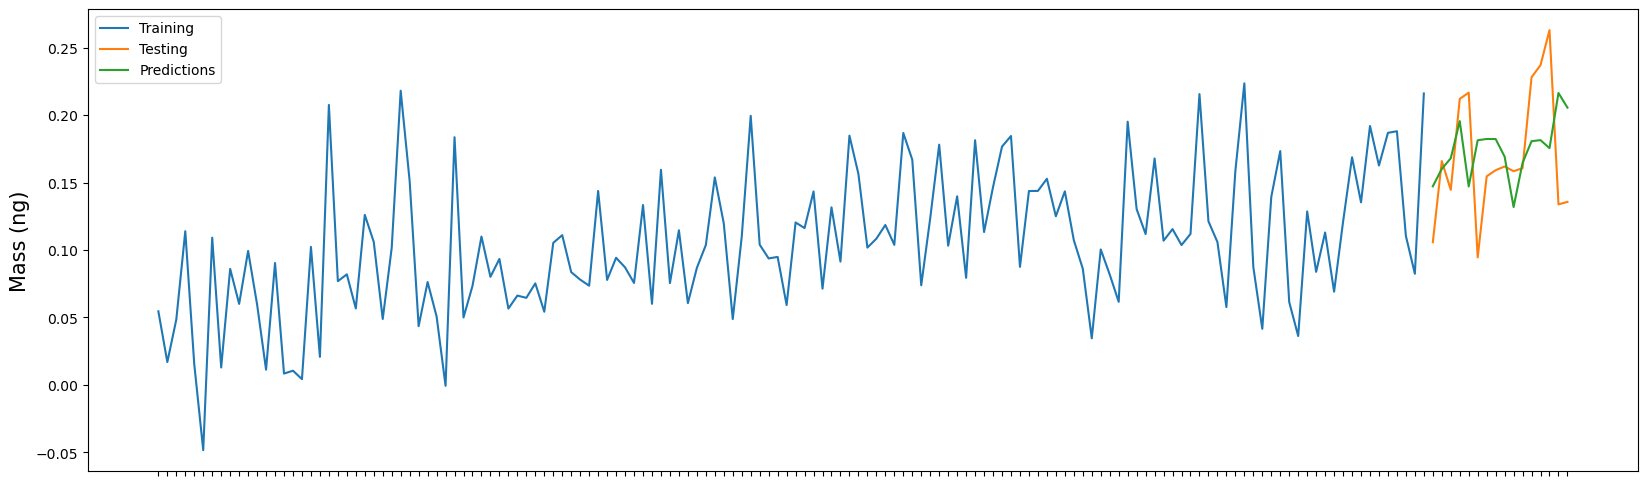

In [58]:
# Visualize
fig, ax = plt.subplots(figsize=(20,6)) 
plt.plot(train, label='Training')
plt.plot(test, label='Testing')
plt.plot(predictions, label='Predictions')
plt.ylabel('Mass (ng)', fontsize=15)
plt.gca().set_xticklabels([])
plt.legend()
plt.show()

In [59]:
forecast = model_fit.forecast(steps=40)
forecast

142    0.147181
143    0.160100
144    0.167973
145    0.195510
146    0.147101
147    0.181321
148    0.182269
149    0.182227
150    0.169187
151    0.131805
152    0.164572
153    0.180607
154    0.181415
155    0.175437
156    0.216357
157    0.205495
158    0.200599
159    0.222734
160    0.174383
161    0.205733
162    0.197669
163    0.206652
164    0.207665
165    0.214456
166    0.201724
167    0.214643
168    0.222516
169    0.250053
170    0.201645
171    0.235864
172    0.236812
173    0.236770
174    0.223730
175    0.186348
176    0.219116
177    0.235150
178    0.235958
179    0.229980
180    0.270900
181    0.260038
dtype: float64

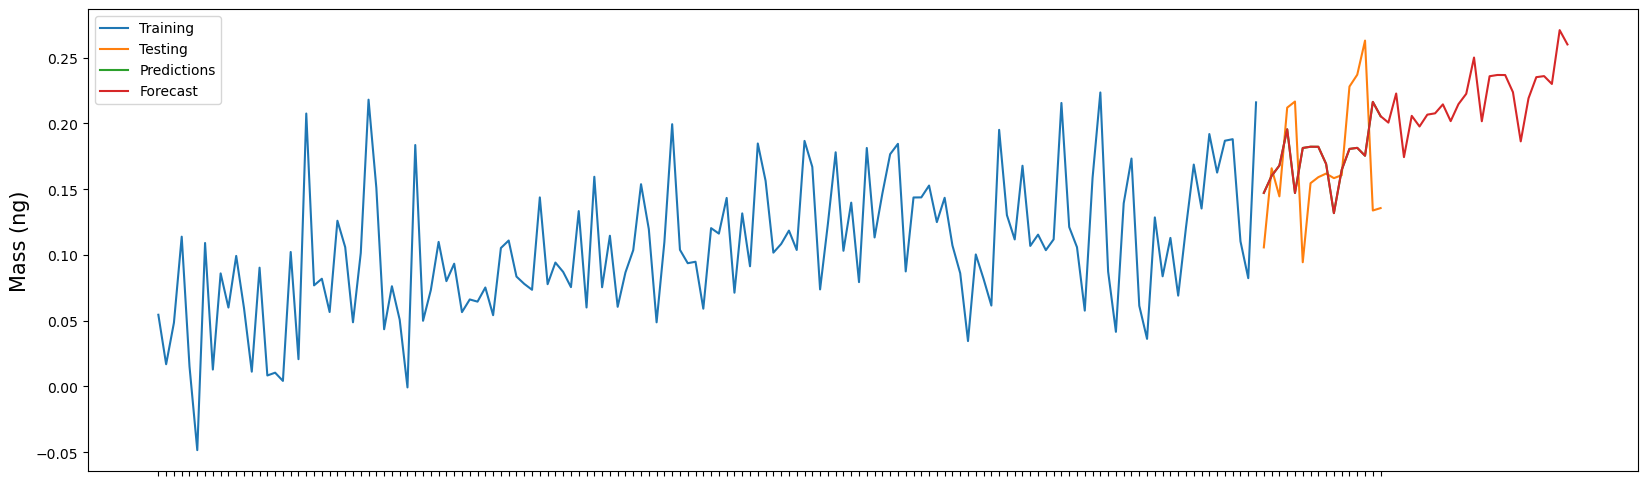

In [60]:
fig, ax = plt.subplots(figsize=(20,6)) 
plt.plot(train, label='Training')
plt.plot(test, label='Testing')
plt.plot(predictions, label='Predictions')
plt.ylabel('Mass (ng)', fontsize=15)
plt.plot(range(len(train), len(train)+len(forecast)), forecast, label='Forecast')
plt.gca().set_xticklabels([])
plt.legend()
plt.show()

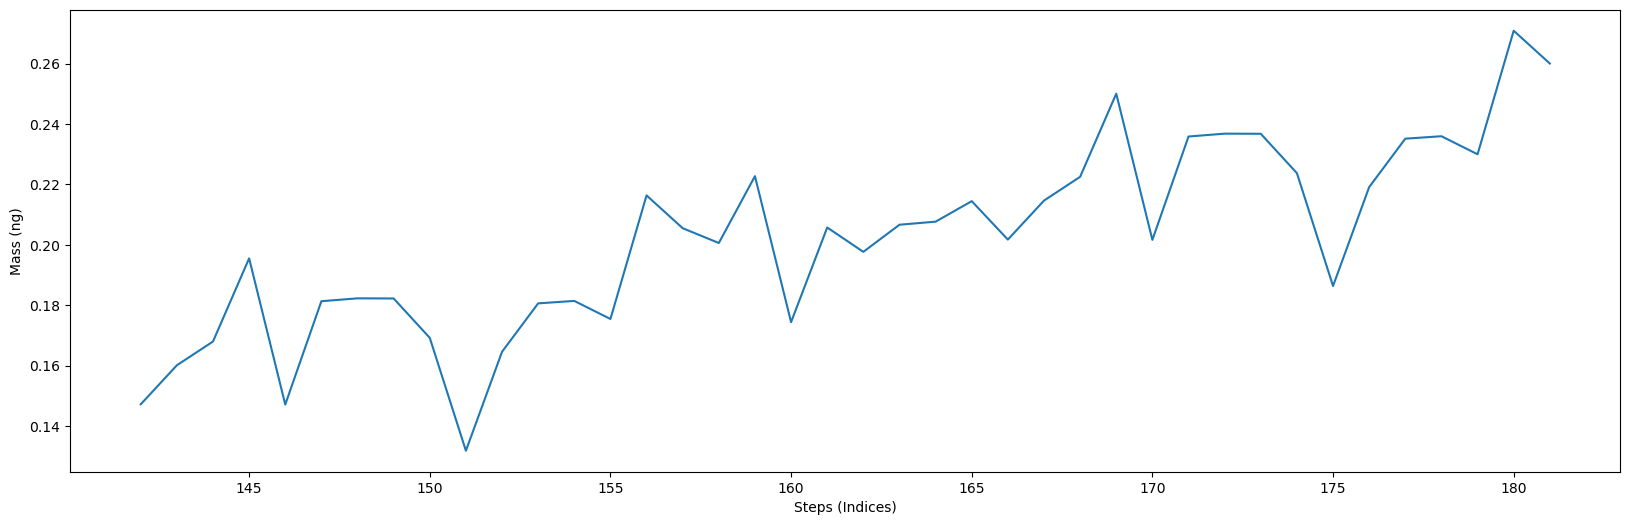

In [61]:
fig, ax = plt.subplots(figsize=(20,6)) 
plt.plot(forecast)
plt.xlabel('Steps (Indices)', fontsize=10)
plt.ylabel('Mass (ng)', fontsize=10)
plt.show()

# 20200910 (Yeast 2)

Check for seasonality

In [62]:
df10Y2 = pd.read_csv('20200910Y2.csv')

In [63]:
df10Y2 = df10Y2.rename(columns={'Time (h)': 'time', 'Mass (ng)': 'mass', 'Mean mass (ng)' : 'mean'})
df10Y2 = df10Y2.drop(['mean'], axis = 1)
df10Y2 = df10Y2.dropna()

In [64]:
df10Y2 = df10Y2[df10Y2['mass']>0]

In [65]:
sdc = df10Y2[['mass']].copy()

In [66]:
dc_result = seasonal_decompose(sdc, model="multiplicative", period = 24)

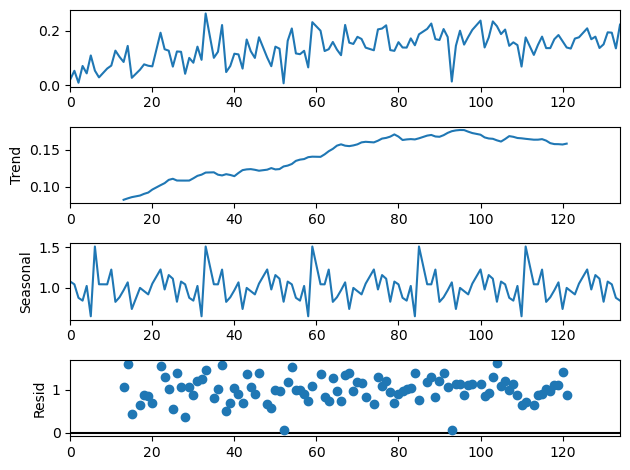

In [67]:
trend = dc_result.trend
seasonal = dc_result.seasonal
residual = dc_result.resid

dc_result.plot();

Forecasting

In [68]:
df10Y2 = pd.read_csv('20200910Y2.csv')

In [69]:
df10Y2 = df10Y2.rename(columns={'Time (h)': 'time', 'Mass (ng)': 'mass', 'Mean mass (ng)' : 'mean'})
df10Y2 = df10Y2.drop(['mean'], axis = 1)
df10Y2 = df10Y2.dropna()

In [70]:
df10Y2['time'] = df10Y2['time'].apply(decimal_to_hms)

In [71]:
df10Y2.set_index('time', inplace=True)

In [72]:
train_size = int(len(df10Y2) * 0.8)
train = df10Y2[:train_size]
test = df10Y2[train_size:]

In [73]:
alpha = 0.3
beta = 0.1
gamma = 0.2

In [74]:
# Create and fit the model
model = ExponentialSmoothing(train, seasonal_periods=24, trend='add', seasonal='add')
model_fit = model.fit(smoothing_level=alpha, smoothing_trend=beta, smoothing_seasonal=gamma)


In [75]:
# predictions on test
predictions = model_fit.forecast(len(test))

In [76]:
# Evaluate 
mse = mean_squared_error(test, predictions)
rmse = np.sqrt(mse)
print(f'MSE: {mse}, RMSE: {rmse}')


MSE: 0.013317682093918922, RMSE: 0.11540226208319715


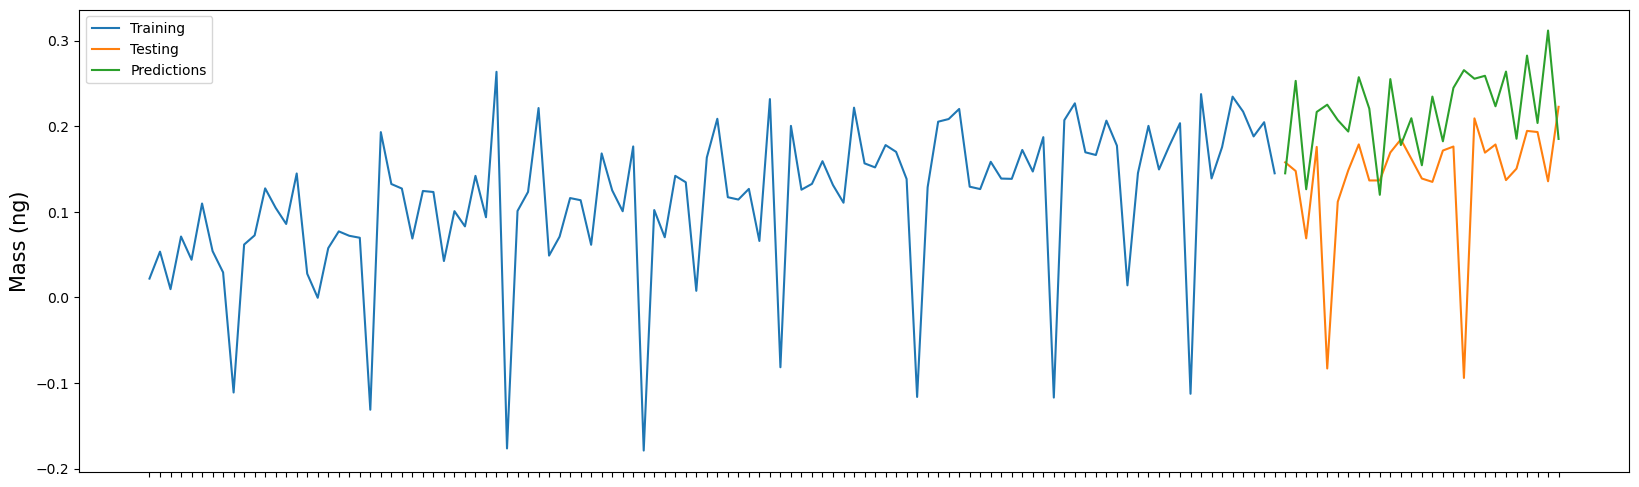

In [77]:
# Visualize the results
fig, ax = plt.subplots(figsize=(20,6)) 
plt.plot(train, label='Training')
plt.plot(test, label='Testing')
plt.plot(predictions, label='Predictions')
plt.ylabel('Mass (ng)', fontsize=15)
plt.gca().set_xticklabels([])
plt.legend()
plt.show()

In [78]:
forecast = model_fit.forecast(steps=40)
forecast

108    0.144872
109    0.252879
110    0.126261
111    0.216602
112    0.225039
113    0.207088
114    0.193683
115    0.257185
116    0.220447
117    0.119756
118    0.254933
119    0.177875
120    0.209220
121    0.154276
122    0.234527
123    0.182287
124    0.244715
125    0.265410
126    0.255388
127    0.258807
128    0.223198
129    0.263755
130    0.185292
131    0.282395
132    0.203674
133    0.311681
134    0.185063
135    0.275404
136    0.283841
137    0.265890
138    0.252485
139    0.315987
140    0.279249
141    0.178558
142    0.313735
143    0.236677
144    0.268022
145    0.213078
146    0.293329
147    0.241089
dtype: float64

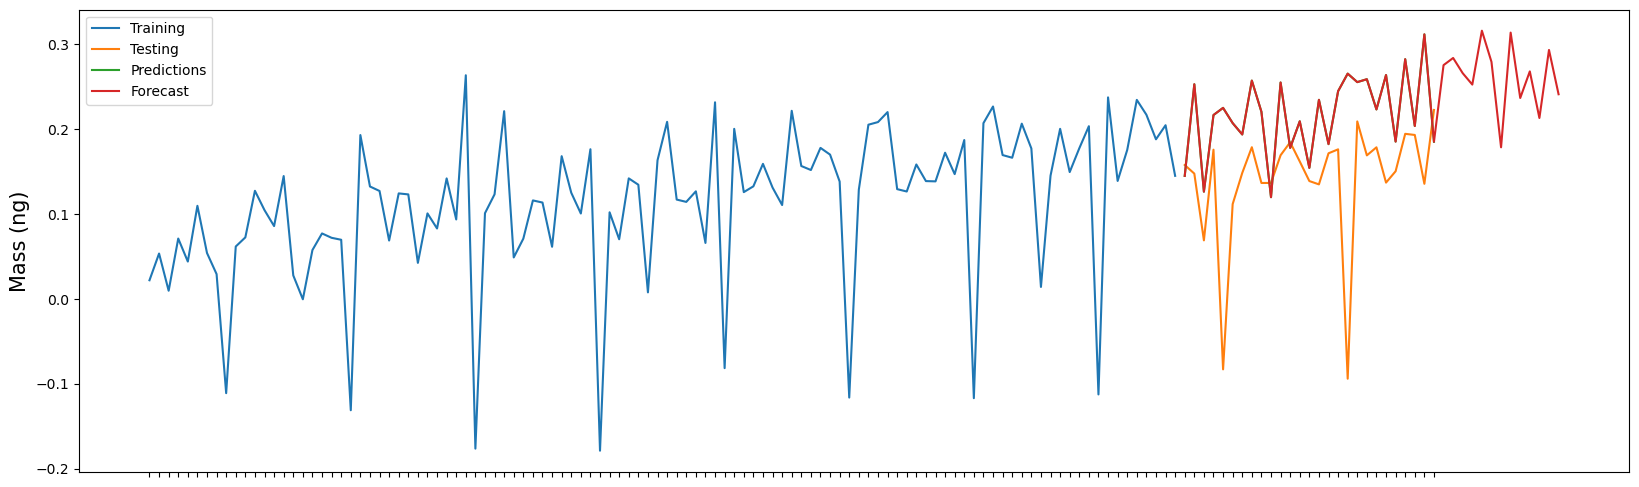

In [79]:
fig, ax = plt.subplots(figsize=(20,6)) 
plt.plot(train, label='Training')
plt.plot(test, label='Testing')
plt.plot(predictions, label='Predictions')
plt.ylabel('Mass (ng)', fontsize=15)
plt.plot(range(len(train), len(train)+len(forecast)), forecast, label='Forecast')
plt.gca().set_xticklabels([])
plt.legend()
plt.show()

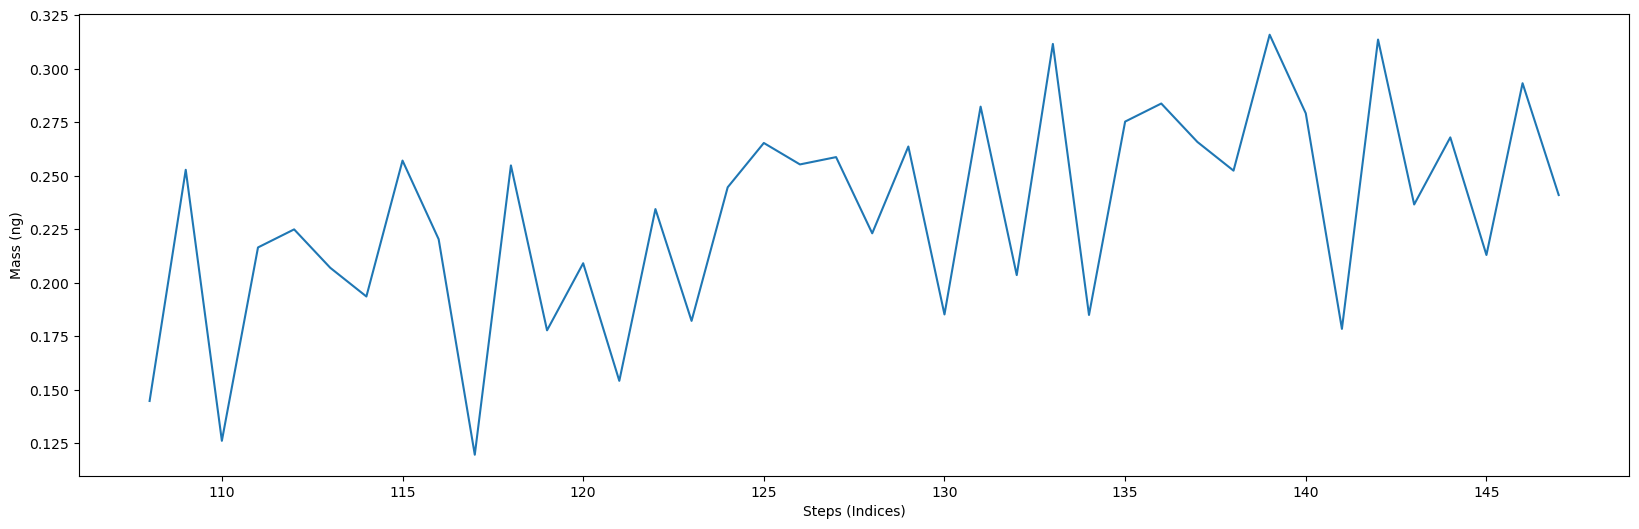

In [80]:
fig, ax = plt.subplots(figsize=(20,6)) 
plt.plot(forecast)
plt.xlabel('Steps (Indices)', fontsize=10)
plt.ylabel('Mass (ng)', fontsize=10)
plt.show()

# 20200911 (Yeast 2)

Check for seasonality

In [81]:
df11Y2 = pd.read_csv('20200911Y2.csv')

In [82]:
df11Y2 = df11Y2.rename(columns={'Time (h)': 'time', 'Mass (ng)': 'mass', 'Mean mass (ng)' : 'mean'})
df11Y2 = df11Y2.drop(['mean'], axis = 1)
df11Y2 = df11Y2.dropna()

In [83]:
df11Y2 = df11Y2[df11Y2['mass']>0]

In [84]:
sdc = df11Y2[['mass']].copy()

In [85]:
dc_result = seasonal_decompose(sdc, model="multiplicative", period = 24)

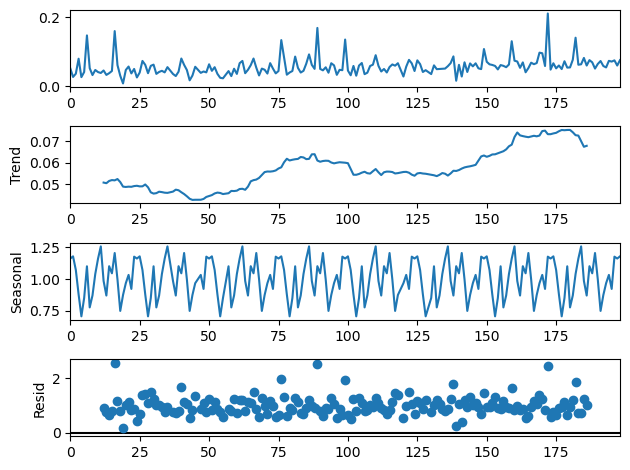

In [86]:
trend = dc_result.trend
seasonal = dc_result.seasonal
residual = dc_result.resid

dc_result.plot();

Forecasting

In [87]:
df11Y2 = pd.read_csv('20200911Y2.csv')

In [88]:
df11Y2 = df11Y2.rename(columns={'Time (h)': 'time', 'Mass (ng)': 'mass', 'Mean mass (ng)' : 'mean'})
df11Y2 = df11Y2.drop(['mean'], axis = 1)
df11Y2 = df11Y2.dropna()

In [89]:
df11Y2['time'] = df11Y2['time'].apply(decimal_to_hms)

In [90]:
df11Y2.set_index('time', inplace=True)

In [91]:
train_size = int(len(df11Y2) * 0.9)
train = df11Y2[:train_size]
test = df11Y2[train_size:]

In [92]:
alpha = 0.3
beta = 0.1
gamma = 0.2

In [93]:
# Create 
model = ExponentialSmoothing(train, seasonal_periods=24, 
                             trend='add', seasonal='add')

# Fit the model 
model_fit = model.fit(smoothing_level=alpha, 
                      smoothing_trend=beta, smoothing_seasonal=gamma)


In [94]:
# Make predictions for the test data
predictions = model_fit.forecast(len(test))

In [95]:
# Evaluate the model
mse = mean_squared_error(test, predictions)
rmse = np.sqrt(mse)
print(f'MSE: {mse}, RMSE: {rmse}')


MSE: 0.0005657854715977004, RMSE: 0.02378624542877039


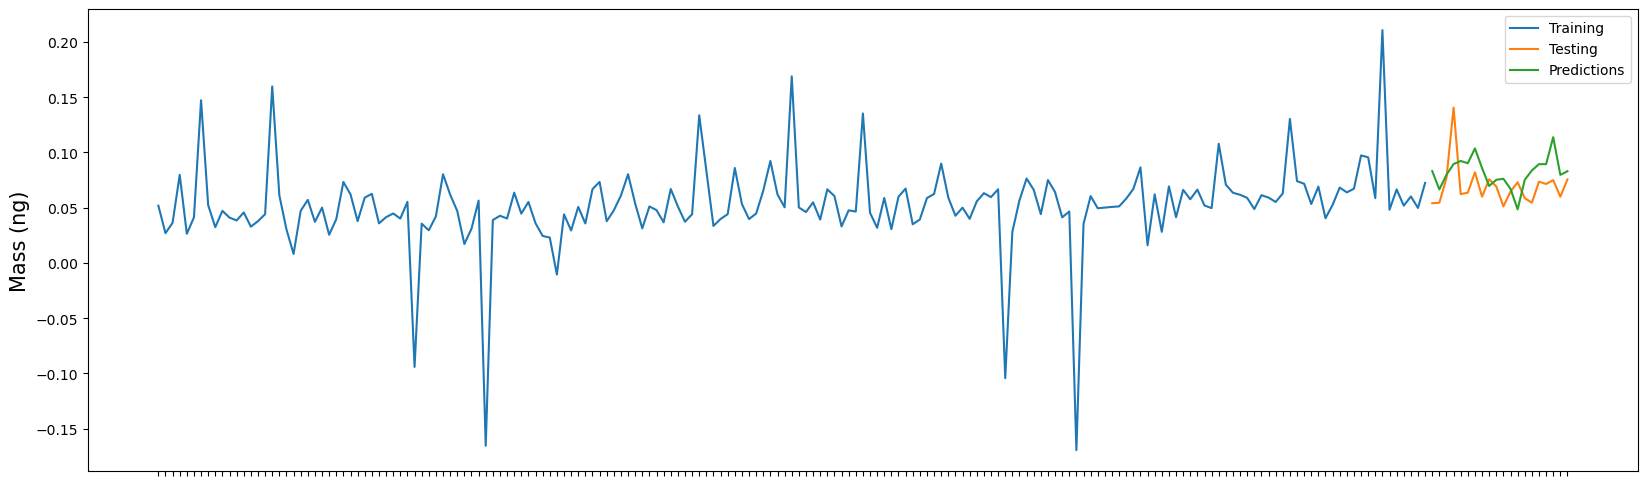

In [96]:
# Visualize the results
fig, ax = plt.subplots(figsize=(20,6)) 
plt.plot(train, label='Training')
plt.plot(test, label='Testing')
plt.plot(predictions, label='Predictions')
plt.ylabel('Mass (ng)', fontsize=15)
plt.gca().set_xticklabels([])
plt.legend()
plt.show()

In [97]:
forecast = model_fit.forecast(steps=40)
forecast

179    0.083193
180    0.066540
181    0.079818
182    0.089541
183    0.092322
184    0.090297
185    0.103657
186    0.085927
187    0.069720
188    0.075282
189    0.076205
190    0.067108
191    0.048521
192    0.075253
193    0.083752
194    0.089487
195    0.089428
196    0.113874
197    0.079729
198    0.083045
199    0.067113
200    0.069894
201    0.047784
202    0.076312
203    0.086790
204    0.070136
205    0.083414
206    0.093138
207    0.095918
208    0.093893
209    0.107253
210    0.089523
211    0.073317
212    0.078878
213    0.079801
214    0.070704
215    0.052117
216    0.078850
217    0.087349
218    0.093083
dtype: float64

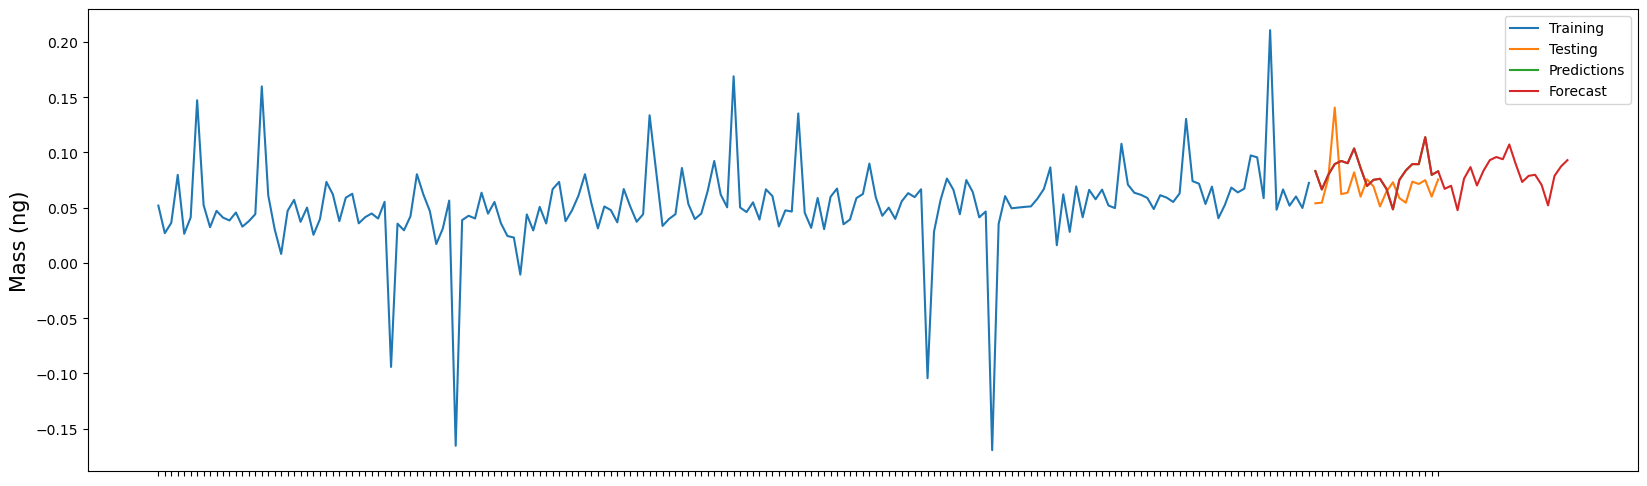

In [98]:
fig, ax = plt.subplots(figsize=(20,6)) 
plt.plot(train, label='Training')
plt.plot(test, label='Testing')
plt.plot(predictions, label='Predictions')
plt.ylabel('Mass (ng)', fontsize=15)
plt.plot(range(len(train), len(train)+len(forecast)), forecast, label='Forecast')
plt.gca().set_xticklabels([])
plt.legend()
plt.show()

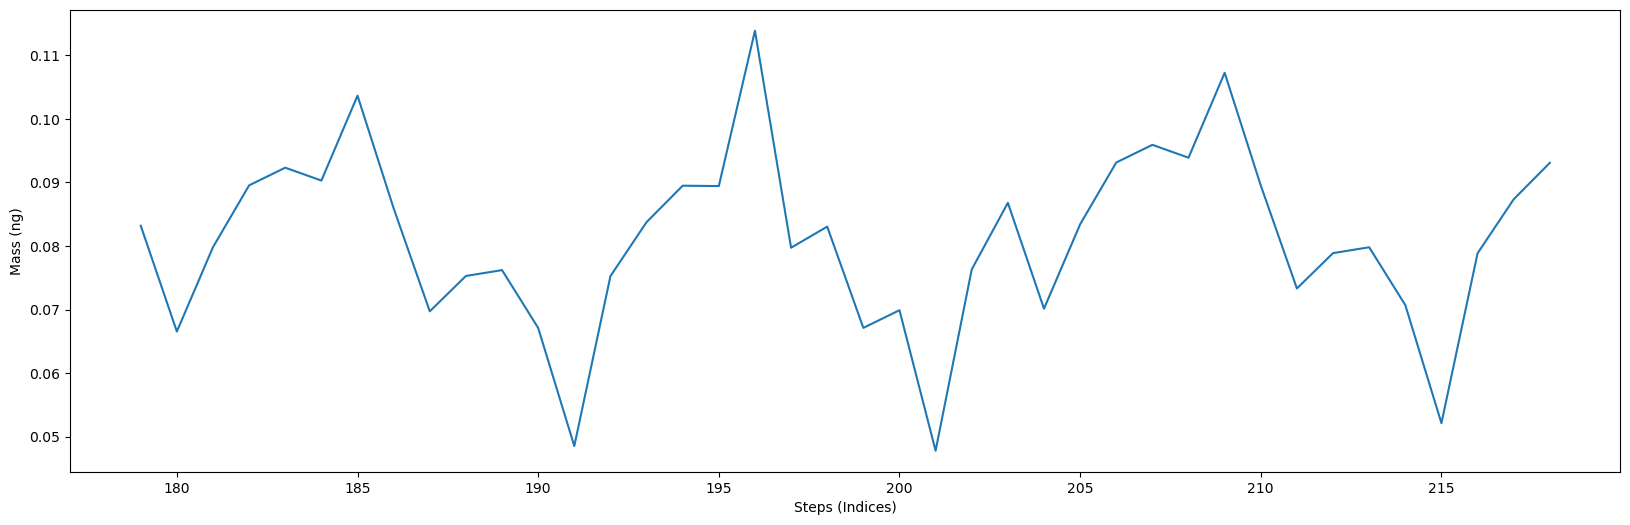

In [99]:
fig, ax = plt.subplots(figsize=(20,6)) 
plt.plot(forecast)
plt.xlabel('Steps (Indices)', fontsize=10)
plt.ylabel('Mass (ng)', fontsize=10)
plt.show()

# 20200924

Check for seasonality

In [100]:
df24Y2 = pd.read_csv('20200924.csv')

In [101]:
df24Y2 = df24Y2.rename(columns={'Time (h)': 'time', 'Mass (ng)': 'mass', 'Mean mass (ng)' : 'mean'})
df24Y2 = df24Y2.drop(['mean'], axis = 1)
df24Y2 = df24Y2.dropna()

In [102]:
df24Y2 = df24Y2[df24Y2['mass']>0]

In [103]:
sdc = df24Y2[['mass']].copy()

In [104]:
dc_result = seasonal_decompose(sdc, model="multiplicative", period = 24)

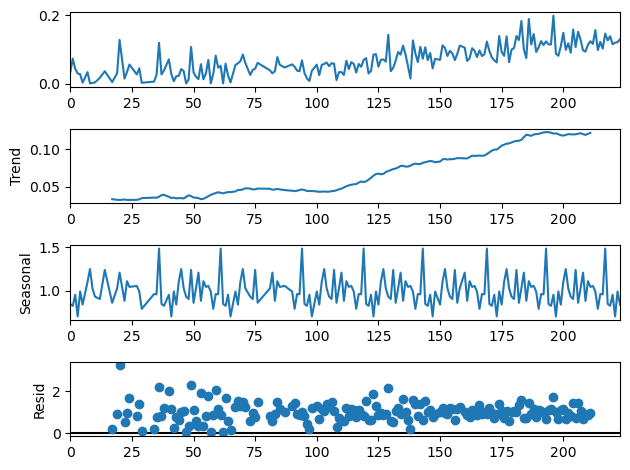

In [105]:
trend = dc_result.trend
seasonal = dc_result.seasonal
residual = dc_result.resid

dc_result.plot();

Forecasting

In [106]:
df24Y2 = pd.read_csv('20200924.csv')

In [107]:
df24Y2 = df24Y2.rename(columns={'Time (h)': 'time', 'Mass (ng)': 'mass', 'Mean mass (ng)' : 'mean'})
df24Y2 = df24Y2.drop(['mean'], axis = 1)
df24Y2 = df24Y2.dropna()

In [108]:
df24Y2['time'] = df24Y2['time'].apply(decimal_to_hms)

In [109]:
df24Y2

,time,mass
0,0:00:00,0.033601
1,0:00:36,0.073389
2,0:01:12,0.043862
3,0:01:48,0.030238
4,0:02:24,0.027916
...,...,...
219,2:11:54,0.138958
220,2:12:30,0.115476
221,2:13:06,0.119857
222,2:13:42,0.121624


In [110]:
df24Y2.set_index('time', inplace=True)

In [111]:
train_size = int(len(df24Y2) * 0.8)
train = df24Y2[:train_size]
test = df24Y2[train_size:]

In [112]:
alpha = 0.3
beta = 0.1
gamma = 0.2

In [113]:
# Create the model
model = ExponentialSmoothing(train, seasonal_periods=24, trend='add', seasonal='add')

# Fit the model to the training data
model_fit = model.fit(smoothing_level=alpha, smoothing_trend=beta, smoothing_seasonal=gamma)


In [114]:
# Make predictions for the test data
predictions = model_fit.forecast(len(test))

In [115]:
# Evaluate the model
mse = mean_squared_error(test, predictions)
rmse = np.sqrt(mse)
print(f'MSE: {mse}, RMSE: {rmse}')


MSE: 0.001059750353466445, RMSE: 0.03255380705027363


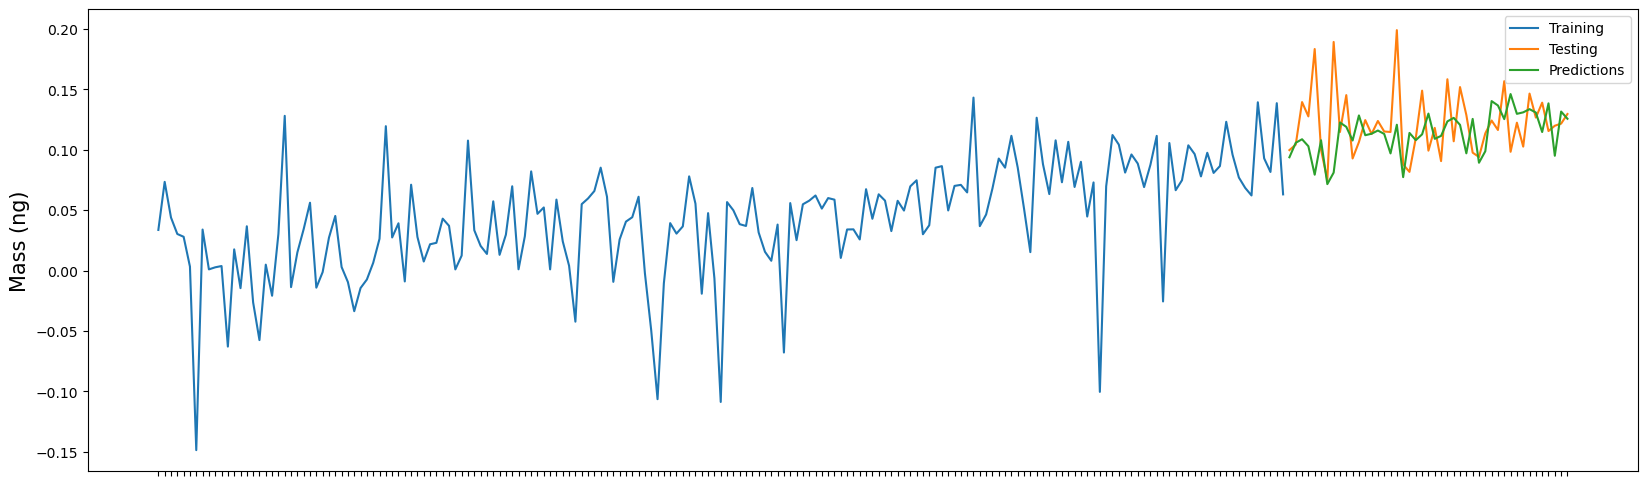

In [116]:
# Visualize the results
fig, ax = plt.subplots(figsize=(20,6)) 
plt.plot(train, label='Training')
plt.plot(test, label='Testing')
plt.plot(predictions, label='Predictions')
plt.ylabel('Mass (ng)', fontsize=15)
plt.gca().set_xticklabels([])
plt.legend()
plt.show()

In [117]:
forecast = model_fit.forecast(steps=60)
forecast

179    0.093755
180    0.105758
181    0.108677
182    0.102887
183    0.079313
184    0.107819
185    0.071530
186    0.081057
187    0.122562
188    0.118941
189    0.107637
190    0.128394
191    0.112017
192    0.113258
193    0.115898
194    0.113084
195    0.096953
196    0.120691
197    0.077309
198    0.113913
199    0.107940
200    0.112764
201    0.129936
202    0.109021
203    0.111455
204    0.123458
205    0.126378
206    0.120588
207    0.097013
208    0.125520
209    0.089230
210    0.098757
211    0.140262
212    0.136641
213    0.125337
214    0.146095
215    0.129717
216    0.130958
217    0.133598
218    0.130784
219    0.114654
220    0.138392
221    0.095009
222    0.131613
223    0.125640
224    0.130465
225    0.147636
226    0.126721
227    0.129155
228    0.141159
229    0.144078
230    0.138288
231    0.114714
232    0.143220
233    0.106930
234    0.116457
235    0.157963
236    0.154341
237    0.143038
238    0.163795
dtype: float64

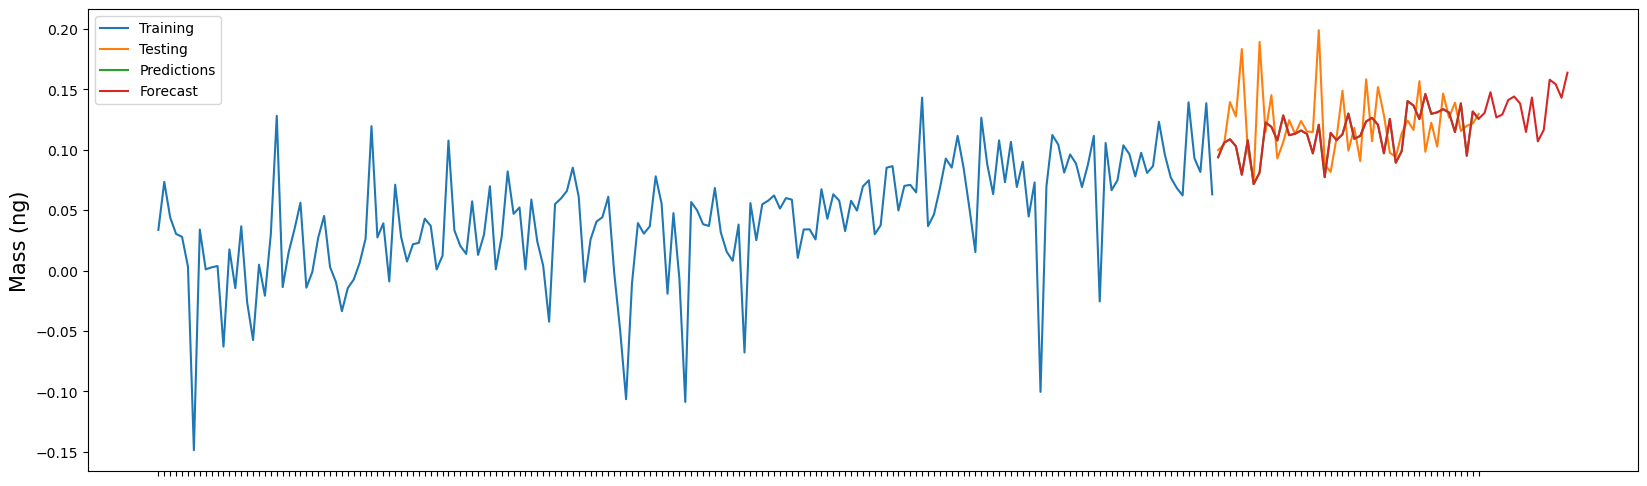

In [118]:
fig, ax = plt.subplots(figsize=(20,6)) 
plt.plot(train, label='Training')
plt.plot(test, label='Testing')
plt.plot(predictions, label='Predictions')
plt.ylabel('Mass (ng)', fontsize=15)
plt.plot(range(len(train), len(train)+len(forecast)), forecast, label='Forecast')
plt.gca().set_xticklabels([])
plt.legend()
plt.show()

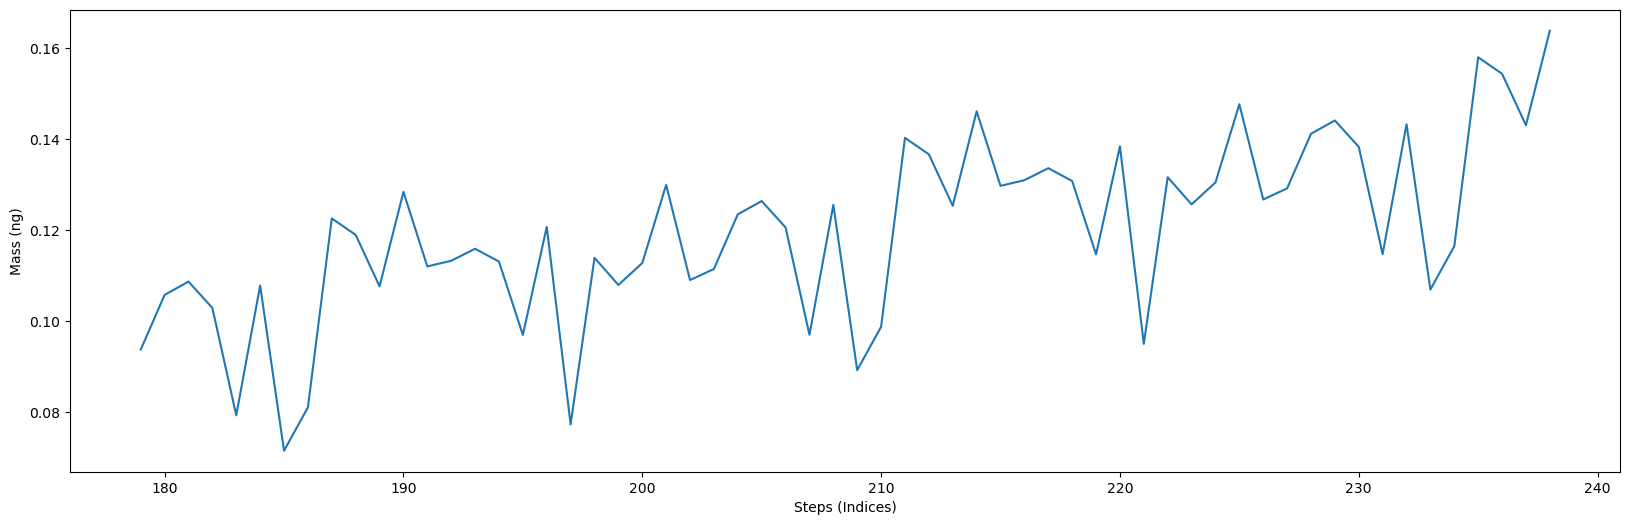

In [119]:
fig, ax = plt.subplots(figsize=(20,6)) 
plt.plot(forecast)
plt.xlabel('Steps (Indices)', fontsize=10)
plt.ylabel('Mass (ng)', fontsize=10)
plt.show()

# 20201008 (Yeast 1)

Check for seasonality

In [120]:
df008Y1 = pd.read_csv('20201008Y1.csv')

In [121]:
df008Y1 = df008Y1.dropna()

In [122]:
df008Y1 = df008Y1[df008Y1['mass']>0]

In [123]:
sdc = df008Y1[['mass']].copy()

In [124]:
dc_result = seasonal_decompose(sdc, model="multiplicative", period = 24)

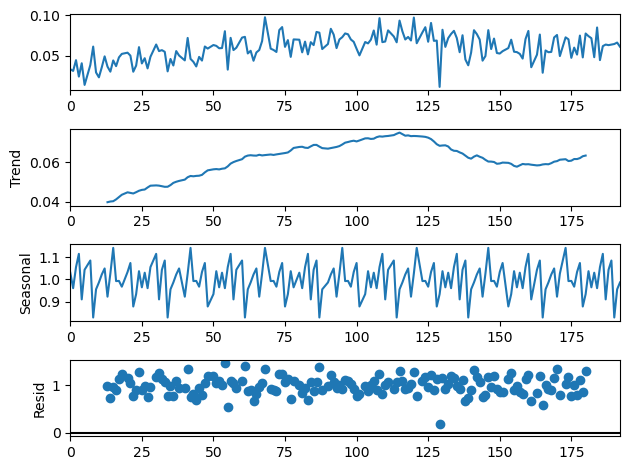

In [125]:
trend = dc_result.trend
seasonal = dc_result.seasonal
residual = dc_result.resid

dc_result.plot();

Forecasting

In [126]:
df008Y1 = pd.read_csv('20201008Y1.csv')

In [127]:
df008Y1 = df008Y1.dropna()

In [128]:
df008Y1['time'] = df008Y1['time'].apply(decimal_to_hms)

In [129]:
df008Y1.set_index('time', inplace=True)

In [130]:
train_size = int(len(df008Y1) * 0.85)
train = df008Y1[:train_size]
test = df008Y1[train_size:]

In [131]:
alpha = 0.3
beta = 0.1
gamma = 0.2

In [132]:

# Create 
model = ExponentialSmoothing(train, seasonal_periods=24, trend='add', seasonal='add')

# Fit 
model_fit = model.fit(smoothing_level=alpha, smoothing_trend=beta, smoothing_seasonal=gamma)


In [133]:
# Make predictions for the test data
predictions = model_fit.forecast(len(test))

In [134]:
# Evaluate the model
mse = mean_squared_error(test, predictions)
rmse = np.sqrt(mse)
print(f'MSE: {mse}, RMSE: {rmse}')


MSE: 0.00019738199022283203, RMSE: 0.014049270095732092


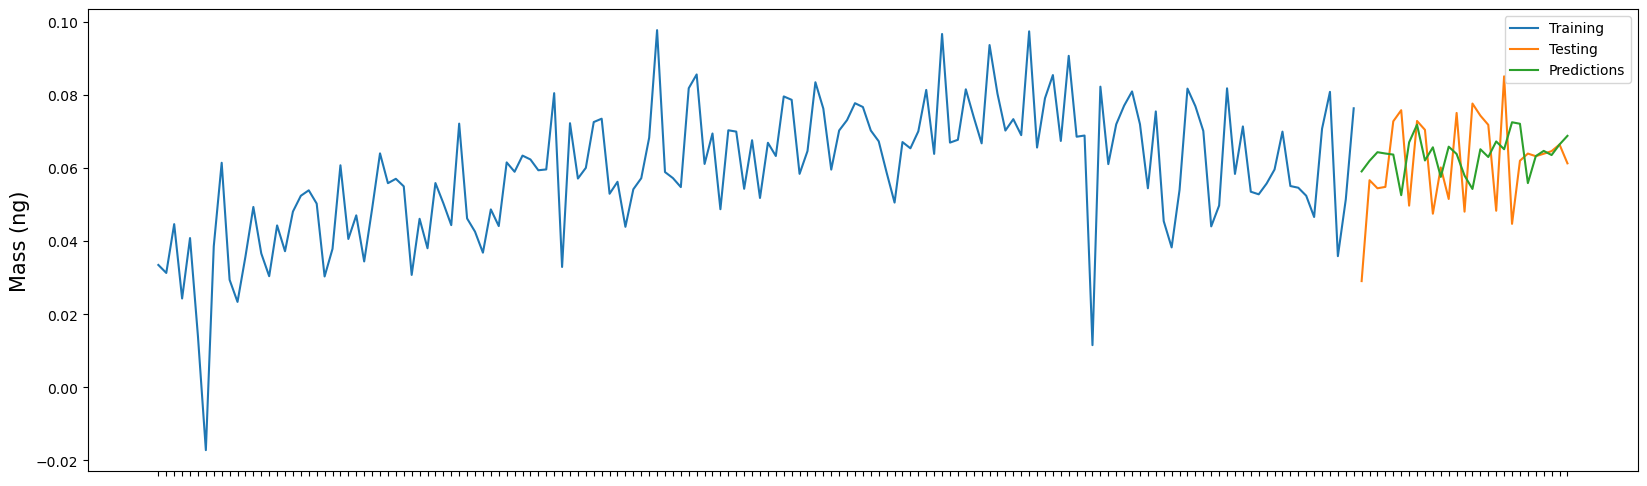

In [135]:
# Visualize 
fig, ax = plt.subplots(figsize=(20,6)) 
plt.plot(train, label='Training')
plt.plot(test, label='Testing')
plt.plot(predictions, label='Predictions')
plt.ylabel('Mass (ng)', fontsize=15)
plt.gca().set_xticklabels([])
plt.legend()
plt.show()

In [136]:
forecast = model_fit.forecast(steps=40)
forecast

152    0.059060
153    0.061955
154    0.064312
155    0.063954
156    0.063659
157    0.052556
158    0.067008
159    0.071836
160    0.062051
161    0.065654
162    0.057553
163    0.065823
164    0.063829
165    0.057916
166    0.054258
167    0.065118
168    0.063001
169    0.067251
170    0.065122
171    0.072501
172    0.072089
173    0.055859
174    0.063239
175    0.064673
176    0.063533
177    0.066429
178    0.068785
179    0.068427
180    0.068133
181    0.057029
182    0.071481
183    0.076309
184    0.066524
185    0.070127
186    0.062026
187    0.070296
188    0.068302
189    0.062389
190    0.058732
191    0.069592
dtype: float64

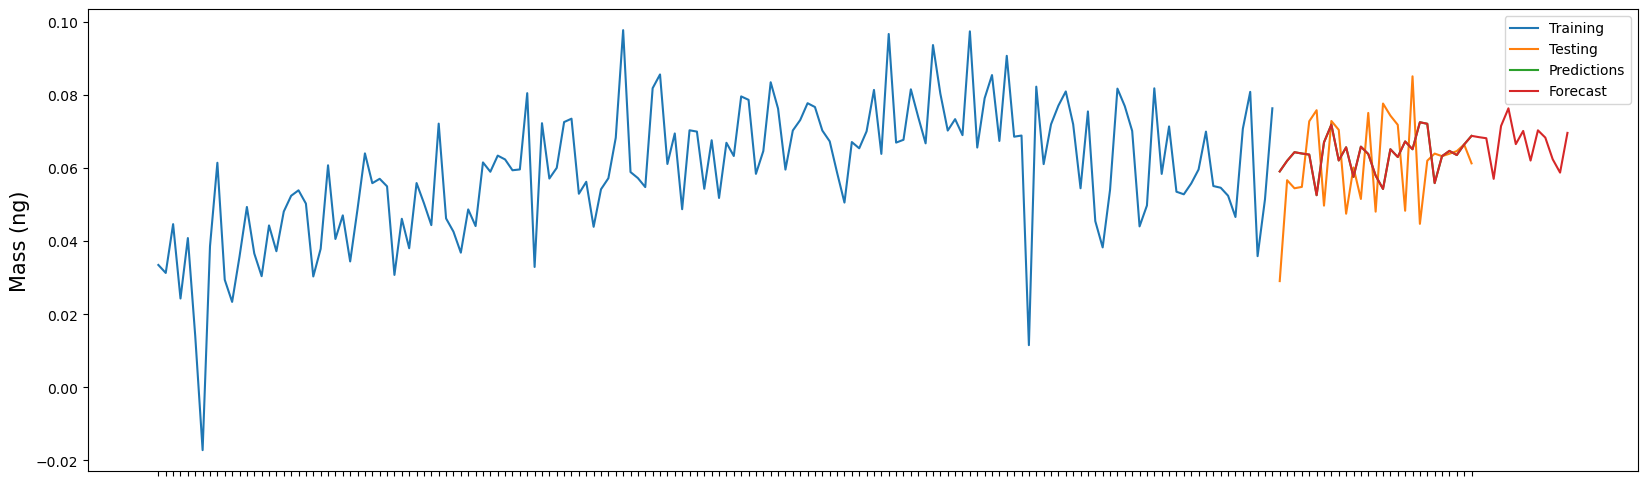

In [137]:
fig, ax = plt.subplots(figsize=(20,6)) 
plt.plot(train, label='Training')
plt.plot(test, label='Testing')
plt.plot(predictions, label='Predictions')
plt.ylabel('Mass (ng)', fontsize=15)
plt.plot(range(len(train), len(train)+len(forecast)), forecast, label='Forecast')
plt.gca().set_xticklabels([])
plt.legend()
plt.show()

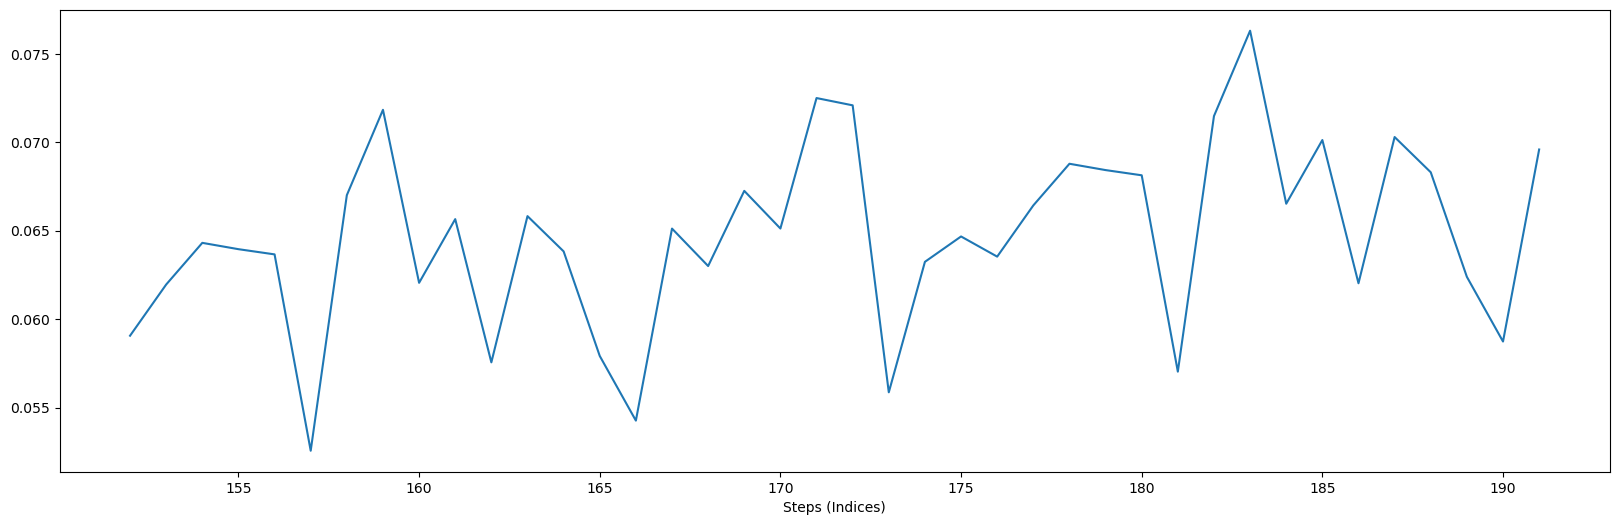

In [138]:
fig, ax = plt.subplots(figsize=(20,6)) 
plt.plot(forecast)
plt.xlabel('Steps (Indices)', fontsize=10)
plt.show()